In [2]:
%run "./utils.ipynb"

Using TensorFlow backend.


# Main configs

In [3]:
loadFromMerged=True
loadFromIndexes= False
Mapper='S'
IgnoreEmpty= True
FoldID ="1"
Epoch_count=100
Batch_size=5000
INCLUDE_DIRECTION = True

LOAD_OLD_DATA_TRAIN = False
LOAD_OLD_DATA_TEST = False
MERGE_TESTS=True

TEST_CLASS_CAP =999999

pre_Process_remove_empties = True


# per Karthika's change
SKIP_LOCK_FILE = True

In [4]:
def print_info(y_test, pred , classes , confidance=0.5, print_skf1=False, size= 500):
    
    counts = np.sum( y_test.astype(int) , axis=0)
    
    pred[pred>=confidance] = 1
    pred[pred<confidance] = 0
    
#     acc_wierd  =acc_match_wierd(y_test, pred)
    
    conf= multilabel_confusion_matrix( y_test , pred.astype(int), labels= range(len(classes)))
    accs = [make_recall_shit(x) for x in conf]
      
    
    unknonw_index =-1

    tp = 0.00000001
    tn = 0.00000001
    fp =0.00000001
    fn = 0.00000001
    
    for index in range(len(classes)):
        if 'unknown' in classes[index]:
            unknonw_index = index
            continue
            
        tp += conf[index][1][1]
        tn += conf[index][0][0]
        fp += conf[index][0][1] 
        fn += conf[index][1][0]
        
    acc = (tp+tn)*1.0 / ( tp+tn+fp+fn)*1.0
    recall = tp*1.0/ ( tp+fn ) *1.0
    prec = tp*1.0 / ( tp+fp )*1.0
    F= 2.0*( tp)/ (2*tp + fp + fn)
    
    knowns_accs= [acc, recall, prec, F]
    print ("------------------------------------------------------------------------")
    index = unknonw_index
    tp += conf[index][1][1]
    tn += conf[index][0][0]
    fp += conf[index][0][1] 
    fn += conf[index][1][0]

    acc = (tp+tn)*1.0 / ( tp+tn+fp+fn)*1.0
    recall = tp*1.0/ ( tp+fn ) *1.0
    prec = tp*1.0 / ( tp+fp )*1.0
    F= 2.0*( tp)/ (2*tp + fp + fn)
    
 
    all_accs =  [acc, recall, prec, F]
 
  
    return size, all_accs, knowns_accs

In [5]:
from ipywidgets import IntProgress
from IPython.display import display
pbar = IntProgress(min=0, max=len(range(50, 26000, 200)))  
display(pbar) 

IntProgress(value=0, max=130)

In [6]:
def label_2_vec(y_data, classes):
    ret = []
    
    for i,x in enumerate(classes):
        if 'unknown' in x:
            unknown_index = i
            break
    
    for i,x in enumerate(y_data):
        temp = np.zeros(len(classes))
        x= list(set(x.split(' ')))
        for y in x: 
            if y in classes:
                temp[classes.index(y)] = 1
                
        if np.sum(temp) == 0 :
            temp[unknown_index] = 1
        ret.append(temp)
    return ret


In [9]:
if Mapper=='SE':
    classes = ['button-held',
     'button-pushed',
            "colorTemperature-XXX",
    "contact-closed",
    "contact-open",
    "level-XXX",
    "lock-locked",
    "lock-unlocked",
    "motion-active",
    "motion-inactive",
    "ping-ping",
    "status-closed",
    "status-open",
    "switch-off",
    "switch-on",
    "temperature-XXX",
    'unknown'
        ] 
else:
     classes =["button",
    "colorTemperature",
    "contact",
    "level",
    "lock",
    "motion",
    "ping",
    "status",
    "switch",
    "temperature",
    'unknown']
count_eval_results = []
file_name = os.path.join("../files/seq2seq_preds/home_os_final_test_services_to_keep_0_pred" )
gt= []
with open(file_name, 'r') as file:
    results = file.readlines()
    results = [x.strip() for x in results]
    gt = np.array( label_2_vec(results, classes))
    
    
for t_len in range(50, 26000, 200):
    
    seq2seq_results = []

    file_name = os.path.join("../files/seq2seq_preds/home_os_final_test_services_to_keep_0_pred_first_%d" % t_len)
    with open(file_name, 'r') as file:
        results = file.readlines()
        results = [x.strip() for x in results]
        results = label_2_vec(results, classes)
        pred = np.array(results)

    
    count_eval_results.append(print_info( gt, pred, classes, confidance=0.09))
    pbar.value += 1

/opt/anaconda3/envs/omid/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
---------------------------------------------------

------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
---------------------------------------------------

In [10]:
rng =  range(50, 26000, 200)
count_eval_results_new = [] 
for i,x in enumerate(count_eval_results):
    count_eval_results_new.append((rng[i], count_eval_results[i][1], count_eval_results[i][2]) ) 
# count_eval_results_new[:50]
count_eval_results = count_eval_results_new

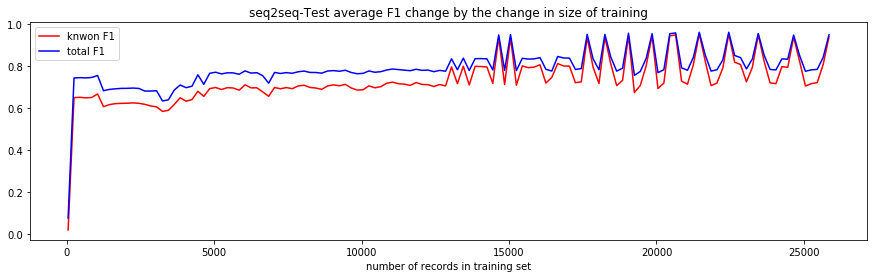

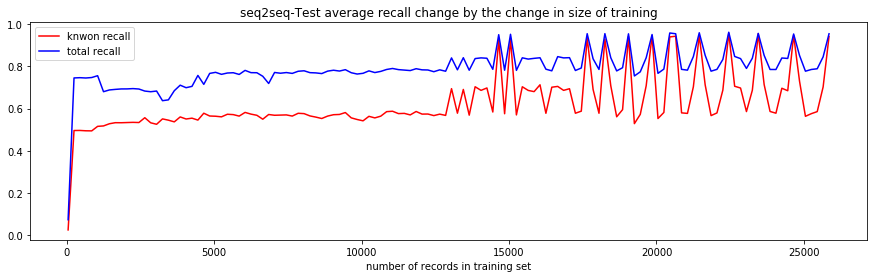

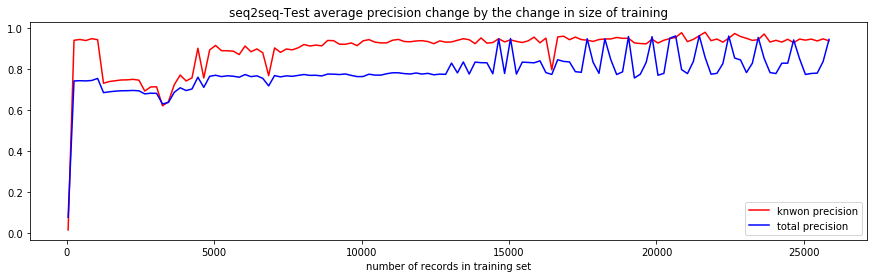

In [14]:

counts = [x[0] for x in count_eval_results]
known_f1 = [x[2][-1] for x in count_eval_results]
all_f1 = [x[1][-1] for x in count_eval_results]

known_recall = [x[2][1] for x in count_eval_results]
all_recall = [x[1][1] for x in count_eval_results]

known_pres = [x[2][-2] for x in count_eval_results]
all_pres = [x[1][-2] for x in count_eval_results]

plt.figure(figsize=(15,4))
plt.title('seq2seq-Test average F1 change by the change in size of training')
plt.xlabel('number of records in training set')
plt.plot(counts, known_f1, c='red',  label='knwon F1')
plt.plot(counts, all_f1, c='blue',  label='total F1')

plt.legend()

plt.figure(figsize=(15,4))
plt.title('seq2seq-Test average recall change by the change in size of training')
plt.xlabel('number of records in training set')

plt.plot(counts, known_recall, c='red',  label='knwon recall')
plt.plot(counts, all_recall, c='blue',  label='total recall')

plt.legend()

plt.figure(figsize=(15,4))
plt.title('seq2seq-Test average precision change by the change in size of training')
plt.xlabel('number of records in training set')

plt.plot(counts, known_pres, c='red',  label='knwon precision')
plt.plot(counts, all_pres, c='blue',  label='total precision')

plt.legend()

In [12]:
def flatter(inp):
    ret = [inp[0]]
    ret.extend(inp[1])
    ret.extend(inp[2])
    
    return ret

csv_ready = [flatter(x) for x in count_eval_results]

    
import csv 

with open('./outputs/seq2seq_training_by_row_evaluation-%s.csv' % Mapper , 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['#training','acc','recall','precision','f1','known_acc','knwon_recall', 'known_precision','known_f1'])
    writer.writerows(csv_ready)

In [13]:
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
